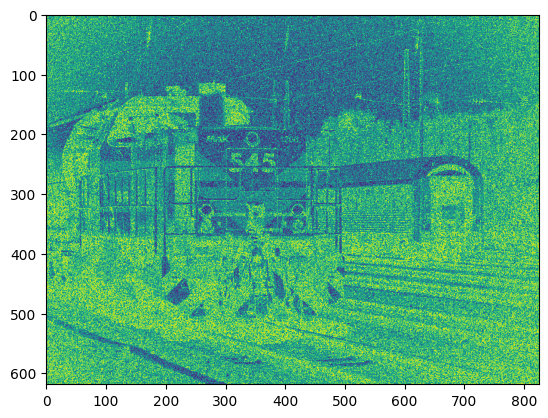

In [ ]:
#1.1. Biến đổi cường độ ảnh (Image inverse transformation)
from PIL import Image
import math
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open image
img = Image.open("/content/image.jpg").convert('L')
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)

img.show()
plt.imshow(new_img)
plt.show()


<ipython-input-23-6d86ce6be93c>:16: RuntimeWarning: divide by zero encountered in divide
  b3 = b2 / b1


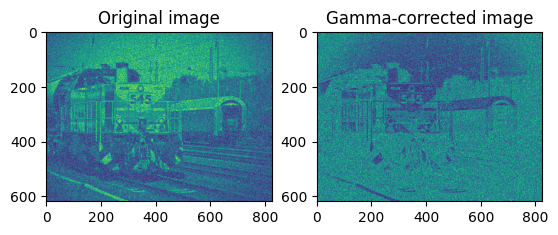

In [ ]:

# 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)
import cv2
from PIL import Image
import math
import numpy as np
import imageio as iio  # Fix the import statement
import matplotlib.pylab as plt

# Đọc ảnh
img = Image.open("/content/image.jpg").convert('L')
im_1 = np.asarray(img)

# Áp dụng gamma correction
gamma = 0.5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b2 / b1
b2 = np.log(b3) * gamma
c = np.exp(b2) * 255.0
c1 = c.astype(int)
d = Image.fromarray(c1.astype(np.uint8))


# Hiển thị ảnh gốc và ảnh sau khi áp dụng gamma correction
plt.subplot(121)
plt.imshow(img)
plt.title("Original image")

plt.subplot(122)
plt.imshow(d)
plt.title("Gamma-corrected image")
plt.show()


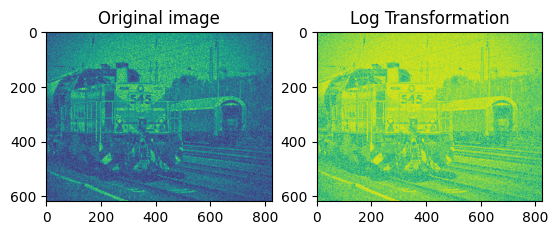

In [ ]:
# 1.3. Thay đổi cường độ điểm ảnh với Log Transformation
import cv2
from PIL import Image
import math
import numpy as np
import imageio as iio  # Fix the import statement
import matplotlib.pylab as plt

# Đọc ảnh
img = Image.open("/content/image.jpg").convert('L')
im_1 = np.asarray(img)
# Áp dụng gamma correction

b1 = im_1.astype(float)
b2 = np.max(b1)

c = (128.0 *np.log(1+b1)/np.log(1+b2))
c1 = c.astype(int)
d = Image.fromarray(c1.astype(np.uint8))

plt.subplot(121)
plt.imshow(img)
plt.title("Original image")

plt.subplot(122)
plt.imshow(d)
plt.title("Log Transformation")
plt.show()

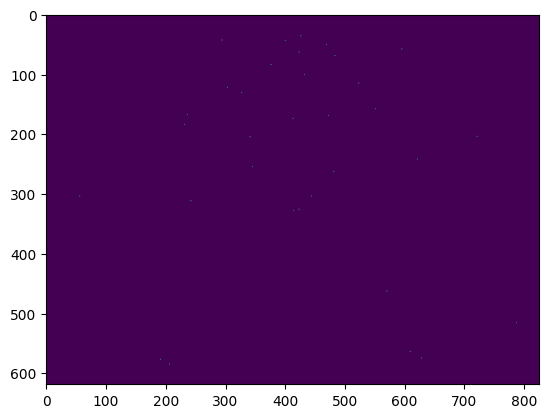

In [ ]:
# 1.4 Histogram equalization
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img= Image.open("/content/image.jpg").convert('L')
#convert image 1 into an ndarray
iml= np.asarray(img)
#convert 2D ndarray from ID array bl iml.flatten ()
bl=iml.flatten()
#histogram and bin are computed

hist, bins = np.histogram (iml, 256,[0, 255])
#cumulative distribution function is computed
cdf = hist.cumsum()
# places where cdf=0 is masked or ignored and # rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0) #histogram equalization is performed
num_cdf_m = (cdf_m -cdf_m.min()) * 255

den_cdf_m =(cdf.max() - cdf_m.min()) * 255

cdf_m = num_cdf_m / den_cdf_m
#the masked places in cdf_m are now 0
cdf = np.ma.filled (cdf_m, 0).astype ('uint8')
# cdf values are assigned in the flattened array
im2 = cdf[b1]
#im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape(im2, iml.shape)

im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

0 255


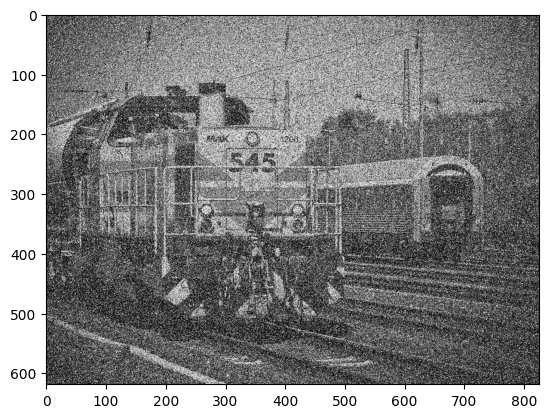

In [ ]:
# 1.5
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img =Image.open("/content/image.jpg").convert('L') #convert image 1 into an ndarray
iml= np.asarray (img)
#finding the maximum and minimum pixel values
b=iml.max()
a = iml.min()
print (a, b)
#converting iml to float
c= iml.astype (float)
#contrast stretching transformation
im2 = 255 *(c-a)/(b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray (im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

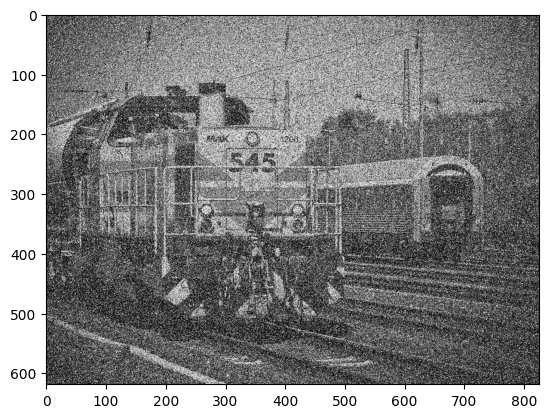

In [ ]:
# 1.6
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open("/content/image.jpg").convert('L') #convert image 1 into an ndarray
iml= np.asarray (img)
# performing FFT
c = abs(scipy.fftpack.fft2 (iml)) #shifting the Fourier frequency image
d = scipy.fftpack.fftshift (c)
d =d.astype (float)
#im2 is converted from ndarray to image im3 = Image.fromarray (d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()